# 폐암 수술환자의 생존율 예측

#### 딥러닝을 구동하는데 필요한 케라스 패키지 호출

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# 필요한 라이브러리 호출
import numpy as np
import tensorflow as tf

# 실행할때마다 같은 결과를 위해 설정
seed = 3
np.random.seed(seed)
tf.random.set_seed(seed)

#### 수술환자 데이터 로드 

In [5]:
Data_set = np.loadtxt("/content/sample_data/ThoraricSurgery.csv", delimiter=",")

In [7]:
Data_set.shape

(470, 18)

In [9]:
Data_set[:2, :]

array([[293.  ,   1.  ,   3.8 ,   2.8 ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,  12.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,
         62.  ,   0.  ],
       [  1.  ,   2.  ,   2.88,   2.16,   1.  ,   0.  ,   0.  ,   0.  ,
          1.  ,   1.  ,  14.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,
         60.  ,   0.  ]])

In [11]:
# 환자의 기록과 수술결과를 분리
X = Data_set[:, :17]
Y = Data_set[:, -1]  # Data_set[:, 18]

#### 모델설계

In [12]:
model = Sequential()
model.add(Dense(30, input_dim = 17, activation='relu')) # 입력층 + 은닉층 , 입력값은 17개
model.add(Dense(1, activation='sigmoid'))  # 출력층, 출력값은 1가지.

#### 모델 컴파일

In [13]:
# loss - `mean_squared_error (평균제곱오차)`
#         `binary_crossentropy` - 예측값이 참과 거짓 혹은 생존(1), 사망(0)과 같이 명확한 이분법적 결과를 원한다면..
# mean_absolue_error : 평균절대오차(실제값과 예측값과의 차이의 절대값)
# mean_squared_logarithm_error - 평균제곱 로그오차(실제 갑소가 예측 값에 로그를 적용한 값의 차이를 제곱한 값의 평균)
# categorical_crossentropy - 범주형교차 엔트로피(일반분류)
model.compile(loss = 'binary_crossentropy', optimizer='rmsprop', metrics = ['accuracy'])

In [14]:
# epochs - 100 각 샘플이 처음부터 끝까지 100번 재사용될때까지 실행을 반복
# batch_size - 샘플을 한 번에 몇개씩 처리할지를 정하는 부분
model.fit(X, Y, epochs= 100, batch_size= 10)

Epoch 1/100
47/47 [==============================] - 2s 2ms/step - loss: 0.7792 - accuracy: 0.7818
Epoch 2/100
47/47 [==============================] - 0s 2ms/step - loss: 0.4359 - accuracy: 0.8573
Epoch 3/100
47/47 [==============================] - 0s 2ms/step - loss: 0.4978 - accuracy: 0.8057
Epoch 4/100
47/47 [==============================] - 0s 2ms/step - loss: 0.5354 - accuracy: 0.7988
Epoch 5/100
47/47 [==============================] - 0s 2ms/step - loss: 0.4774 - accuracy: 0.8484
Epoch 6/100
47/47 [==============================] - 0s 2ms/step - loss: 0.4890 - accuracy: 0.8430
Epoch 7/100
47/47 [==============================] - 0s 2ms/step - loss: 0.5195 - accuracy: 0.8049
Epoch 8/100
47/47 [==============================] - 0s 2ms/step - loss: 0.5024 - accuracy: 0.8258
Epoch 9/100
47/47 [==============================] - 0s 2ms/step - loss: 0.4481 - accuracy: 0.8566
Epoch 10/100
47/47 [==============================] - 0s 2ms/step - loss: 0.4407 - accuracy: 0.8596
Epoch 11/

# 피마 인디언 당뇨병 예측

## 변수 설명
* pregnant - 과거 임신 횟수
* plasma - 포도당 부하검사 2시간 후 공보 혈당 농도
* pressure - 확장기 혈압
* thickness - 삼두근 피부 주름 두께
* insulin -  혈청 인슐린
* BMI -  체질량 지수(체중 대비 몸무게 비율)
* pedigree : 당뇨병 가족력
* age : 나이
* class - 1(당뇨), 0(당뇨아님)

In [51]:
import pandas as pd
df = pd.read_csv("/content/sample_data/pima-indians-diabetes.csv", header = None,
                 names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pdigree", "age", "class"])
df.head(5)

,pregnant,plasma,pressure,thickness,insulin,BMI,pdigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [55]:
dataset = np.loadtxt("/content/sample_data/pima-indians-diabetes.csv", delimiter=",")
X = dataset[:, 0:8]
Y = dataset[:, 8]

## 데이터 탐색(EDA)

In [21]:
display(df.shape, df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pdigree    768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(768, 9)

None

In [23]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pdigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [25]:
df[['pregnant', 'class']]

,pregnant,class
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
...,...,...
763,10,0
764,2,0
765,5,0
766,1,1


In [30]:
# as_index = False를 하면 다시 reset_index해서 할 필요없이 바로 groupby단계에서 볼수가 있네.
# 내림차순 정렬
df[['pregnant', 'class']].groupby(['pregnant'], as_index = False)['class'].mean().sort_values(by = 'pregnant', ascending = False)

,pregnant,class
16,17,1.000000
15,15,1.000000
14,14,1.000000
13,13,0.500000
12,12,0.444444
11,11,0.636364
10,10,0.416667
9,9,0.642857
8,8,0.578947
7,7,0.555556


In [31]:
df[['pregnant', 'class']].groupby(['pregnant'], as_index = False)['class'].mean().sort_values(by = 'pregnant', ascending = True)

,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


## 그래프 시각화

In [32]:
import matplotlib.pyplot as plt  
import seaborn as sns

In [39]:
#그래프 크기 결정
plt.figure(figsize = (12, 12))
cmaps = [ 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r']

<Figure size 864x864 with 0 Axes>

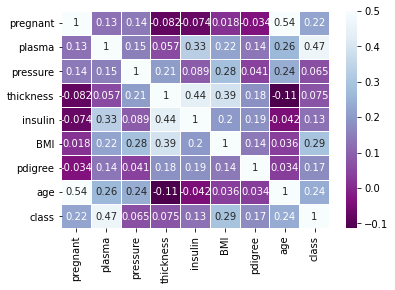

In [47]:
# 변수간 상관관계
np.random.seed(10)
color = np.random.randint(low = 0, high = 40, size = 1)
sns.heatmap(data = df.corr(), linewidths= 0.1, vmax = 0.5, cmap = cmaps[int(color)], linecolor='white', annot = True)
plt.show()

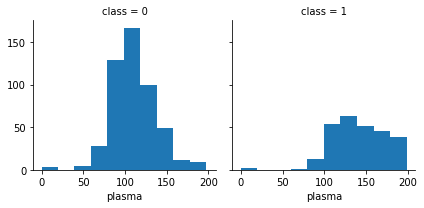

In [48]:
# plasma와 class항목만 따로 떼어 두 항목간의 관계 보기
grid = sns.FacetGrid(df, col = 'class')
grid.map(plt.hist, 'plasma', bins = 10) 

## 당뇨병 예측 실행 

In [49]:
# seed값 생성
np.random.seed(seed)
tf.random.set_seed(seed)

# 모델 설정
model = Sequential()
model.add(Dense(12, input_dim = 8, activation= 'relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [50]:
# 모델 컴파일
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [58]:
# 모델 실행
model.fit(X, Y, epochs = 200, batch_size= 10)

Epoch 1/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4653 - accuracy: 0.7812
Epoch 2/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4652 - accuracy: 0.7799
Epoch 3/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4614 - accuracy: 0.7682
Epoch 4/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4608 - accuracy: 0.7760
Epoch 5/200
77/77 [==============================] - 0s 3ms/step - loss: 0.4652 - accuracy: 0.7747
Epoch 6/200
77/77 [==============================] - 0s 3ms/step - loss: 0.4653 - accuracy: 0.7721
Epoch 7/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4727 - accuracy: 0.7591
Epoch 8/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4756 - accuracy: 0.7682
Epoch 9/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4696 - accuracy: 0.7643
Epoch 10/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4615 - accuracy: 0.7708
Epoch 11/

In [59]:
print("\n 정확도 : %.4f" % (model.evaluate(X, Y)[1]))

24/24 [==============================] - 0s 2ms/step - loss: 0.4382 - accuracy: 0.7839

 정확도 : 0.7839


## 예측값 테스트

In [62]:
# 첫번째 당뇨병 걸린 환자
x = [[6,148,72,35,0,33.6,0.627,50]]
model.predict_classes(x)   # 클래스 예측값(맞게 예측)
model.predict_proba(x)     # 더 큰 확률

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


array([[0.8223256]], dtype=float32)

In [63]:
x = [[1,85,66,29,0,26.6,0.351,31]]
model.predict_classes(x)   # 클래스 예측값(맞게 예측)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0]], dtype=int32)